In [64]:
import pandas as pd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

### Blood transfusion

In [65]:
# first read all pretransfusion value extracted from sql
bt = pd.read_csv('blood_transfusion.csv')
bt.insert(1, 'counts', bt.groupby(['hadm_id'])['starttime'].transform('count'))
# bt = bt.drop_duplicates()
# bt
appear = bt[['hadm_id','starttime']].values

In [66]:
unique_bt = bt[['hadm_id','starttime']].drop_duplicates()[['hadm_id','starttime']].values
    
appear_list = []
for i, j in zip(bt.hadm_id.values,bt.starttime.values):
    each_record = (i,j)
    if(each_record in appear_list):
        print(each_record)
    appear_list.append(each_record)

(22671173, '2179-10-25T17:50:00')


In [67]:
a1 = bt['hadm_id'] ==22671173
b1 = bt['starttime']== '2179-10-25T17:50:00'


bt_strange = bt.loc[(a1 & b1)]
bt_strange

,hadm_id,counts,label,gender,totalamount,totalamountuom,starttime,outtime
124,22671173,6,Packed Red Blood Cells,M,350.0,ml,2179-10-25T17:50:00,2179-10-30T13:38:38
280,22671173,6,Packed Red Blood Cells,M,280.0,ml,2179-10-25T17:50:00,2179-10-30T13:38:38


In [68]:
bt_removed = bt_strange.iloc[[0]]
bt.drop(bt_removed.index, axis=0,inplace=True)
bt

,hadm_id,counts,label,gender,totalamount,totalamountuom,starttime,outtime
0,24209714,3,Packed Red Blood Cells,M,350.0,ml,2160-06-26T21:19:00,2160-07-04T12:56:59
1,21506797,9,Packed Red Blood Cells,M,375.0,ml,2139-04-05T17:00:00,2139-04-12T15:25:03
2,20399778,3,Packed Red Blood Cells,M,375.0,ml,2127-05-08T16:00:00,2127-05-12T21:03:23
3,27361984,1,Packed Red Blood Cells,F,350.0,ml,2177-11-28T06:42:00,2177-12-02T17:18:45
4,23889112,4,Packed Red Blood Cells,F,280.0,ml,2142-01-17T17:48:00,2142-01-21T14:47:48
...,...,...,...,...,...,...,...,...
516,23689280,5,Packed Red Blood Cells,F,279.0,ml,2120-02-08T14:28:00,2120-02-18T15:03:10
517,20088888,3,Packed Red Blood Cells,M,375.0,ml,2143-05-28T16:15:00,2143-06-03T13:11:19
518,22389821,2,Packed Red Blood Cells,M,350.0,ml,2176-09-23T19:30:00,2176-09-28T14:45:11
519,20290742,5,Packed Red Blood Cells,M,350.0,ml,2178-02-22T04:45:00,2178-03-14T16:50:26


In [69]:
def histplot_bloodtransfusion_volume(packed_red_cells,name):
    
    sns.histplot(packed_red_cells, x="totalamount", element="step",
    stat="density", common_norm=False,)
    print(f'mean is {round(np.mean(packed_red_cells.totalamount.values),2)} and std is {round(np.std(packed_red_cells.totalamount.values),2)}')
    
    plt.xlabel("Blood transfusion totalamount")
    plt.ylabel("Density")
    plt.title("Distribution of blood transfusion totalamount ")
#     plt.savefig(f'Bloodtransfusion_plots/{name}_histplot_bloodtransfusion_volume.png')
    plt.show()
    
    
    #sns.displot(data=packed_red_cells,x="totalamount",stat='density',hue = 'gender',kde = True)
    sns.histplot(packed_red_cells, x="totalamount", hue="gender", element="step",stat="density", common_norm=False,)
    
    female = packed_red_cells.loc[packed_red_cells['gender'] =='F']
    male = packed_red_cells.loc[packed_red_cells['gender'] =='M']
    print(f'For female mean is {round(np.mean(female.totalamount.values),2)} and std is {round(np.std(female.totalamount.values),2)}')
    print(f'For male mean is {round(np.mean(male.totalamount.values))} and std is {round(np.std(male.totalamount.values),2)}')
              
    plt.xlabel("Blood transfusion totalamount")
    plt.ylabel("Density")
    plt.title("Distribution of blood transfusion totalamount ")
#     plt.legend()
#     plt.savefig(f'Bloodtransfusion_plots/{name}_histplot_bloodtransfusion_volume_gender.png')
    plt.show()


mean is 336.94 and std is 32.87


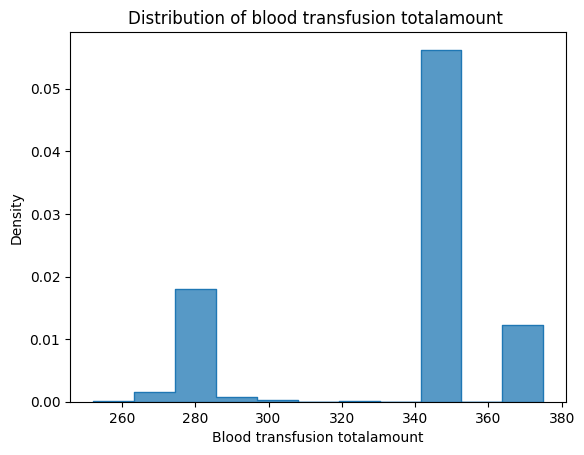

For female mean is 328.06 and std is 36.27
For male mean is 340 and std is 31.28


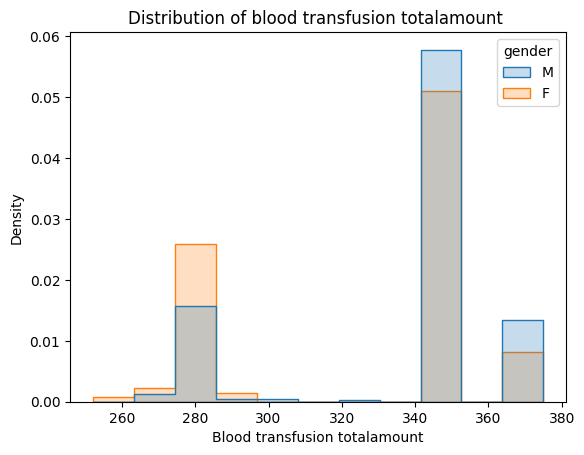

In [70]:
histplot_bloodtransfusion_volume(bt,'MIMIC')

#### for number of blood transfusion for patients

In [71]:
blood_transfusion_count = pd.read_csv('blood_transfusion_counts.csv')
#blood_transfusion_count = packed_red_cells.drop_duplicates(subset=['hadm_id'])
blood_transfusion_count

,hadm_id,gender,counts
0,20006999,M,2
1,20032691,F,1
2,20044587,M,3
3,20087019,F,3
4,20088888,M,3
...,...,...,...
227,29919383,F,2
228,29923776,M,4
229,29924353,M,4
230,29949404,M,2


In [72]:

def histplot_bloodtransfusion_counts(packed_red_cells,name):
    
 
    sns.histplot(packed_red_cells, x="counts", hue="gender", element="step",
    stat="density", common_norm=False,)
    
    
#     plt.legend(prop={'size': 12})
    plt.title('Distribution of number of blood transfusion')
    plt.xlabel('Number of blood transfusion')
    plt.ylabel('Density')
    plt.savefig(f'Bloodtransfusion_plots/{name}_histplot_numberOfbloodTransfusion_gender.png')
    plt.show()
    
    

def boxplot_bloodtransfusion_counts(blood_transfusion_count,name):
    sns.boxplot(x="gender", y='counts', data=blood_transfusion_count)
    plt.title("Number of blood transfusion")
    plt.ylabel('Number of blood transfusion')
    plt.savefig(f'Bloodtransfusion_plots/{name}_boxplot_numberOfbloodTransfusion_gender.png')
    plt.show()
    

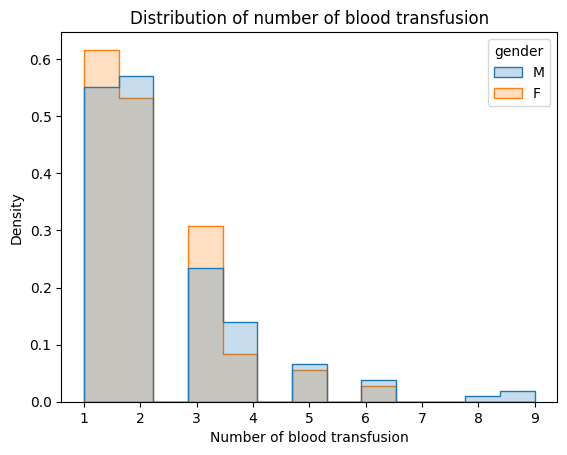

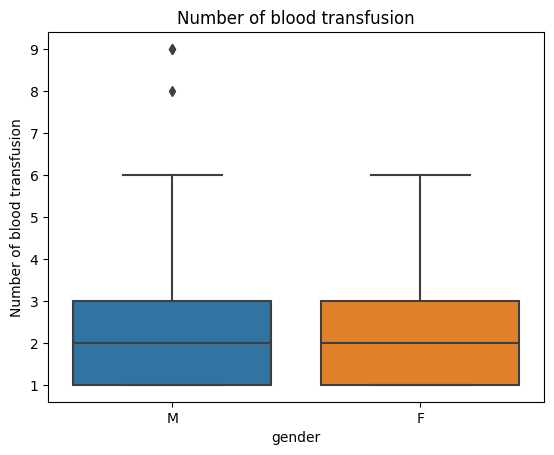

In [73]:
histplot_bloodtransfusion_counts(blood_transfusion_count,"MIMIC")
boxplot_bloodtransfusion_counts(blood_transfusion_count,"MIMIC")


In [74]:
# multiple_transfusion_patients = dict()
# counts_value = np.unique(bt.counts) 
# for _counts in counts_value:
#     if(_counts != 1):
#         patients = np.unique(bt.loc[bt['counts'] ==_counts].hadm_id)
#         multiple_transfusion_patients[_counts] = patients

In [75]:
# multiple_transfusion_patients

### Pre transfusion

### For pre transfusion hemoglobin

In [76]:
# first read all pretransfusion value extracted from sql
df = pd.read_csv('MIMIC-pre.csv')
# find nearest pretransfusion
df.insert(1, 'labevent_before_tranfusion_diff_min', df.groupby(['hadm_id','starttime'])['labevent_before_tranfusion_diff'].transform('min'))
df = df.query('labevent_before_tranfusion_diff_min == labevent_before_tranfusion_diff')
df = df.drop_duplicates()
df = df.rename(columns={'valuenum':'pre_transfusion',"charttime": "charttime_before", "starttime": "blood_transfusion_starttime"})
df

,hadm_id,labevent_before_tranfusion_diff_min,gender,description,pre_transfusion,valueuom,charttime_before,blood_transfusion_starttime,labevent_before_tranfusion_diff
0,20006999,339,M,Hemoglobin,8.5,g/dL,2127-06-19T02:36:00,2127-06-19T08:15:00,339
1,20006999,432,M,Hemoglobin,8.5,g/dL,2127-06-19T02:36:00,2127-06-19T09:48:00,432
16,20032691,204,F,Hemoglobin,8.0,g/dL,2123-03-05T13:10:00,2123-03-05T16:34:00,204
24,20044587,313,M,Hemoglobin,9.5,g/dL,2113-08-25T14:48:00,2113-08-25T20:01:00,313
25,20044587,373,M,Hemoglobin,9.5,g/dL,2113-08-25T14:48:00,2113-08-25T21:01:00,373
...,...,...,...,...,...,...,...,...,...
4437,29924353,725,M,Hemoglobin,9.0,g/dL,2172-03-24T01:53:00,2172-03-24T13:58:00,725
4465,29949404,119,M,Hemoglobin,10.0,g/dL,2169-02-27T12:31:00,2169-02-27T14:30:00,119
4466,29949404,174,M,Hemoglobin,10.0,g/dL,2169-02-27T12:31:00,2169-02-27T15:25:00,174
4477,29964086,174,M,Hemoglobin,9.6,g/dL,2166-04-02T03:03:00,2166-04-02T05:57:00,174


In [77]:
for i in appear:
    if(i not in df[['hadm_id','blood_transfusion_starttime']].values):
        print(i)

#### It is noted that there is 521 records, however there is only 520 blood transfusion in total, look into detail
- Firstly find data with same patient and same blood transfusion time that appear more than once
- then go to dataframe to check detail

In [78]:
# get the weird record's hadm_id and bllodtransfusion time
appear_list = []
for i, j in zip(df.hadm_id.values,df.blood_transfusion_starttime.values):
    each_record = (i,j)
    if(each_record in appear_list):
        print(each_record)
    appear_list.append(each_record)

(20654667, '2119-02-04T16:30:00')


In [79]:
# looking detail
a1 = df['hadm_id'] ==20654667
b1 = df['blood_transfusion_starttime']== '2119-02-04T16:30:00'


df_strange = df.loc[(a1 & b1)].rename(columns={'valuenum':'pre_transfusion',"charttime": "charttime_before", "starttime": "blood_transfusion_starttime"})

df_strange

,hadm_id,labevent_before_tranfusion_diff_min,gender,description,pre_transfusion,valueuom,charttime_before,blood_transfusion_starttime,labevent_before_tranfusion_diff
447,20654667,270,M,Hemoglobin,9.7,g/dL,2119-02-04T12:00:00,2119-02-04T16:30:00,270
448,20654667,270,M,Hemoglobin,9.6,g/dL,2119-02-04T12:00:00,2119-02-04T16:30:00,270


In [80]:
# for count in multiple_transfusion_patients.keys():
#     print(count)
#     patients = multiple_transfusion_patients[count]
#     for each_patient in patients:
#         condition = df['hadm_id'] ==each_patient
#         print(pd.DataFrame(df.loc[condition].sort_values(by=['blood_transfusion_starttime'])))
        
#     break

In [81]:
# a1 = df['hadm_id'] ==21705480
# df.loc[a1]

#### We manually reorganize dataframe to get 500 records which fit the number of blood transfusion 

In [82]:
df_removed = df_strange.iloc[[0]]
df.drop(df_removed.index, axis=0,inplace=True)
pre_transfusion_pd =df

In [83]:
pre_transfusion_pd = pre_transfusion_pd.rename(columns={'valuenum':'pre_transfusion',"charttime": "charttime_before", "starttime": "blood_transfusion_starttime"})
pre_transfusion_pd[['hadm_id', 'gender', 'description', 'pre_transfusion', 'valueuom', 'charttime_before', 'blood_transfusion_starttime', 'labevent_before_tranfusion_diff_min']]

,hadm_id,gender,description,pre_transfusion,valueuom,charttime_before,blood_transfusion_starttime,labevent_before_tranfusion_diff_min
0,20006999,M,Hemoglobin,8.5,g/dL,2127-06-19T02:36:00,2127-06-19T08:15:00,339
1,20006999,M,Hemoglobin,8.5,g/dL,2127-06-19T02:36:00,2127-06-19T09:48:00,432
16,20032691,F,Hemoglobin,8.0,g/dL,2123-03-05T13:10:00,2123-03-05T16:34:00,204
24,20044587,M,Hemoglobin,9.5,g/dL,2113-08-25T14:48:00,2113-08-25T20:01:00,313
25,20044587,M,Hemoglobin,9.5,g/dL,2113-08-25T14:48:00,2113-08-25T21:01:00,373
...,...,...,...,...,...,...,...,...
4437,29924353,M,Hemoglobin,9.0,g/dL,2172-03-24T01:53:00,2172-03-24T13:58:00,725
4465,29949404,M,Hemoglobin,10.0,g/dL,2169-02-27T12:31:00,2169-02-27T14:30:00,119
4466,29949404,M,Hemoglobin,10.0,g/dL,2169-02-27T12:31:00,2169-02-27T15:25:00,174
4477,29964086,M,Hemoglobin,9.6,g/dL,2166-04-02T03:03:00,2166-04-02T05:57:00,174


In [84]:
def get_hemoglobin_distribution(hemoglobin,name):

    sns.displot(data=hemoglobin, x="pre_transfusion", stat="density")
    print(f'mean is {round(np.mean(hemoglobin.pre_transfusion.values),2)} and std is {round(np.std(hemoglobin.pre_transfusion.values),2)}')

    plt.title('Distribution of Pre-transfusion hemoglobin')
    plt.xlabel('Pre-transfusion hemoglobin value,g/dL')
    plt.ylabel('Density')
    #plt.savefig(f'labevent_plots/{name}_Distribution_of_Pre-transfusion_hemoglobin.png')
    plt.show()
    
    sns.histplot(hemoglobin, x="pre_transfusion", hue="gender", element="step",
    stat="density", common_norm=False,)
    female = hemoglobin.loc[hemoglobin['gender'] =='F']
    male = hemoglobin.loc[hemoglobin['gender'] =='M']
    print(f'For female mean is {round(np.mean(female.pre_transfusion.values),2)} and std is {round(np.std(female.pre_transfusion.values),2)}')
    print(f'For male mean is {round(np.mean(male.pre_transfusion.values))} and std is {round(np.std(male.pre_transfusion.values),2)}')
   
    plt.title('Distribution of Pre-transfusion hemoglobin')
    plt.xlabel('Pre-transfusion hemoglobin value,g/dL')
    plt.ylabel('Density')
    
    #plt.savefig(f'labevent_plots/{name}_Distribution_of_Post-transfusion_hemoglobin_gender.png')
    plt.show() 

mean is 8.88 and std is 1.06


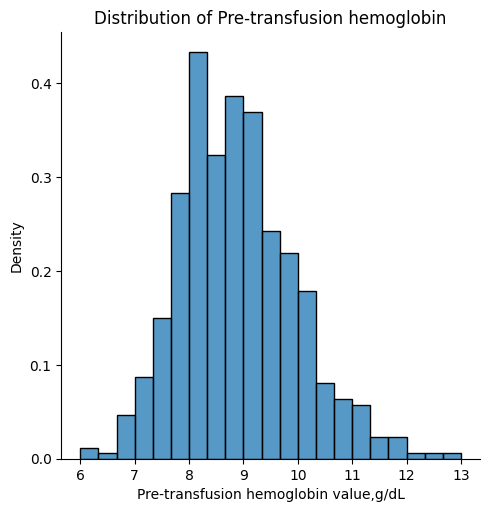

For female mean is 8.83 and std is 0.96
For male mean is 9 and std is 1.09


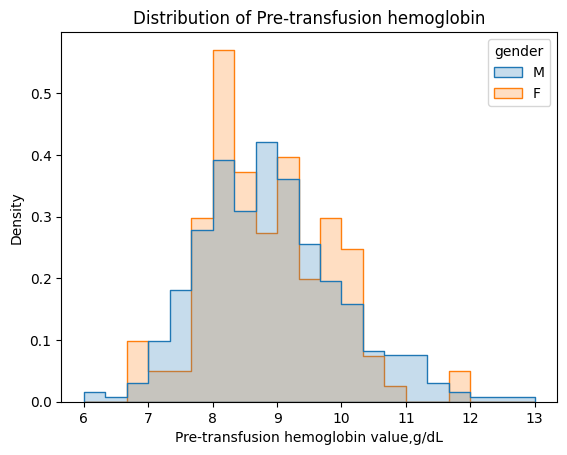

In [85]:
get_hemoglobin_distribution(pre_transfusion_pd,'MIMIC')

### Similarly for post transfusion hemoglobin

In [86]:
# first read all pretransfusion value extracted from sql
df = pd.read_csv('MIMIC-post.csv')
# find nearest pretransfusion
df.insert(1, 'labevent_after_tranfusion_diff_min', df.groupby(['hadm_id','starttime'])['labevents_after_transfusion_diff'].transform('min'))
df = df.query('labevent_after_tranfusion_diff_min == labevents_after_transfusion_diff')
df = df.drop_duplicates()

In [87]:
# get the weird record's hadm_id and bllodtransfusion time
appear_list = []
for i, j in zip(df.hadm_id.values,df.starttime.values):
    each_record = (i,j)
    if(each_record in appear_list):
        print(each_record)
    appear_list.append(each_record)

(21705480, '2123-05-09T20:14:00')
(21705480, '2123-05-09T19:37:00')
(21705480, '2123-05-09T18:31:00')
(21705480, '2123-05-09T17:00:00')
(21705480, '2123-05-09T15:15:00')


In [88]:
# looking detail
a1 = df['hadm_id'] ==21705480
b1 = df['starttime']== '2123-05-09T20:14:00'
b2 = df['starttime']== '2123-05-09T19:37:00'
b3 = df['starttime']== '2123-05-09T18:31:00'
b4 = df['starttime']== '2123-05-09T17:00:00'
b5 = df['starttime']== '2123-05-09T15:15:00'


df_strange = df.loc[(a1 & b1)|(a1 & b2)|(a1 & b3)|(a1 & b4)|(a1 & b5)].rename(columns={'valuenum':'post_transfusion',"charttime": "charttime_after", "starttime": "blood_transfusion_starttime"})

df_strange

,hadm_id,labevent_after_tranfusion_diff_min,gender,description,post_transfusion,valueuom,charttime_after,blood_transfusion_starttime,labevents_after_transfusion_diff
541,21705480,76,M,Hemoglobin,8.4,g/dL,2123-05-09T21:30:00,2123-05-09T20:14:00,76
542,21705480,76,M,Hemoglobin,9.2,g/dL,2123-05-09T21:30:00,2123-05-09T20:14:00,76
543,21705480,113,M,Hemoglobin,8.4,g/dL,2123-05-09T21:30:00,2123-05-09T19:37:00,113
544,21705480,113,M,Hemoglobin,9.2,g/dL,2123-05-09T21:30:00,2123-05-09T19:37:00,113
546,21705480,179,M,Hemoglobin,8.4,g/dL,2123-05-09T21:30:00,2123-05-09T18:31:00,179
547,21705480,179,M,Hemoglobin,9.2,g/dL,2123-05-09T21:30:00,2123-05-09T18:31:00,179
550,21705480,270,M,Hemoglobin,8.4,g/dL,2123-05-09T21:30:00,2123-05-09T17:00:00,270
551,21705480,270,M,Hemoglobin,9.2,g/dL,2123-05-09T21:30:00,2123-05-09T17:00:00,270
553,21705480,375,M,Hemoglobin,8.4,g/dL,2123-05-09T21:30:00,2123-05-09T15:15:00,375
554,21705480,375,M,Hemoglobin,9.2,g/dL,2123-05-09T21:30:00,2123-05-09T15:15:00,375


In [89]:
df_removed = df_strange.iloc[[1,3,5,7,9]]
df.drop(df_removed.index, axis=0,inplace=True)
post_transfusion_pd = df.drop(columns=['gender', 'valueuom','description'])
post_transfusion_pd =post_transfusion_pd.rename(columns={'valuenum':'post_transfusion',"charttime": "charttime_after", "starttime": "blood_transfusion_starttime"})


In [90]:
post_transfusion_pd[post_transfusion_pd['post_transfusion'].isna()]


,hadm_id,labevent_after_tranfusion_diff_min,post_transfusion,charttime_after,blood_transfusion_starttime,labevents_after_transfusion_diff
2152,27636666,1648,NaN,2125-12-29T09:00:00,2125-12-28T05:32:00,1648
2153,27636666,1703,NaN,2125-12-29T09:00:00,2125-12-28T04:37:00,1703


In [91]:
post_transfusion_pd = post_transfusion_pd.dropna()
pre_post_transfusion = pre_transfusion_pd.merge(post_transfusion_pd, how='inner', left_on=['hadm_id','blood_transfusion_starttime'], right_on=['hadm_id','blood_transfusion_starttime'])

### Pre transfusion & post transfusion combine

In [92]:

pre_post_transfusion['value_diff'] = pre_post_transfusion.post_transfusion - pre_post_transfusion.pre_transfusion
pre_post_transfusion['labevent_time_diff_min'] = pre_post_transfusion.labevents_after_transfusion_diff + pre_post_transfusion.labevent_before_tranfusion_diff

pre_post_transfusion = pre_post_transfusion[['hadm_id', 'gender', 'description', 'pre_transfusion', 'post_transfusion', 'value_diff', 'valueuom', 'charttime_before', 'blood_transfusion_starttime', 'charttime_after', 'labevent_time_diff_min', 'labevent_before_tranfusion_diff_min', 'labevent_after_tranfusion_diff_min']]

In [93]:
pre_post_transfusion

,hadm_id,gender,description,pre_transfusion,post_transfusion,value_diff,valueuom,charttime_before,blood_transfusion_starttime,charttime_after,labevent_time_diff_min,labevent_before_tranfusion_diff_min,labevent_after_tranfusion_diff_min
0,20006999,M,Hemoglobin,8.5,9.7,1.2,g/dL,2127-06-19T02:36:00,2127-06-19T08:15:00,2127-06-19T13:55:00,679,339,340
1,20006999,M,Hemoglobin,8.5,9.7,1.2,g/dL,2127-06-19T02:36:00,2127-06-19T09:48:00,2127-06-19T13:55:00,679,432,247
2,20032691,F,Hemoglobin,8.0,9.9,1.9,g/dL,2123-03-05T13:10:00,2123-03-05T16:34:00,2123-03-05T22:59:00,589,204,385
3,20044587,M,Hemoglobin,9.5,9.3,-0.2,g/dL,2113-08-25T14:48:00,2113-08-25T20:01:00,2113-08-26T03:15:00,747,313,434
4,20044587,M,Hemoglobin,9.5,9.3,-0.2,g/dL,2113-08-25T14:48:00,2113-08-25T21:01:00,2113-08-26T03:15:00,747,373,374
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,29924353,M,Hemoglobin,9.0,9.6,0.6,g/dL,2172-03-24T01:53:00,2172-03-24T13:58:00,2172-03-24T16:00:00,847,725,122
514,29949404,M,Hemoglobin,10.0,10.5,0.5,g/dL,2169-02-27T12:31:00,2169-02-27T14:30:00,2169-02-28T03:03:00,872,119,753
515,29949404,M,Hemoglobin,10.0,10.5,0.5,g/dL,2169-02-27T12:31:00,2169-02-27T15:25:00,2169-02-28T03:03:00,872,174,698
516,29964086,M,Hemoglobin,9.6,10.9,1.3,g/dL,2166-04-02T03:03:00,2166-04-02T05:57:00,2166-04-02T08:46:00,343,174,169


In [94]:
blood_transfusion_count
pre_post_transfusion = pre_post_transfusion.merge(blood_transfusion_count, how='left', left_on=['hadm_id','gender'], right_on=['hadm_id','gender'])
pre_post_transfusion = pre_post_transfusion.rename(columns={'counts':'blood_counts'})

In [95]:
def get_hemoglobin_diff_distribution(hemoglobin,name):

    sns.displot(data=hemoglobin, x="value_diff", stat="density")
    print(f'mean is {round(np.mean(hemoglobin.value_diff.values),2)} and std is {round(np.std(hemoglobin.value_diff.values),2)}')

    plt.title('Distribution of difference between \n Post-transfusion hemoglobin and Pre-transfusion hemoglobin')
    plt.xlabel('Difference in Hemoglobin value,g/dL')
    plt.ylabel('Density')
#     plt.savefig(f'labevent_plots/{name}_Distribution_of_value_diff_hemoglobin.png')
    plt.show()
    
    sns.histplot(hemoglobin, x="value_diff", hue="gender", element="step",
    stat="density", common_norm=False,)
    female = hemoglobin.loc[hemoglobin['gender'] =='F']
    male = hemoglobin.loc[hemoglobin['gender'] =='M']
    print(f'For female mean is {round(np.mean(female.value_diff.values),2)} and std is {round(np.std(female.value_diff.values),2)}')
    print(f'For male mean is {round(np.mean(male.value_diff.values))} and std is {round(np.std(male.value_diff.values),2)}')

    plt.title('Distribution of difference between \n Post-transfusion hemoglobin and Pre-transfusion hemoglobin')
    plt.xlabel('Difference in Hemoglobin value,g/dL')
    plt.ylabel('Density')
#     plt.savefig(f'labevent_plots/{name}_Distribution_of_value_diff_hemoglobin_gender.png')
    plt.show()
    

mean is 0.99 and std is 1.3


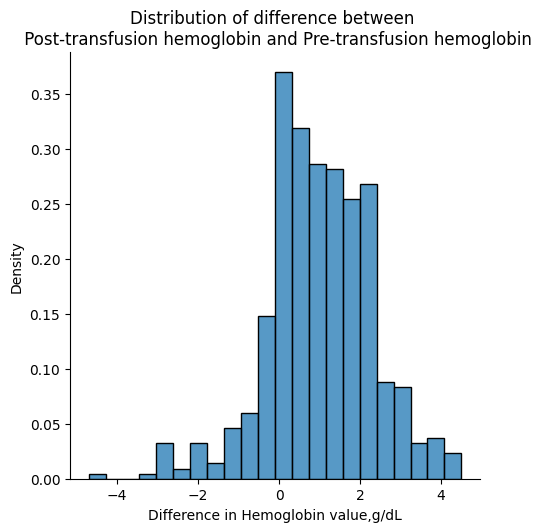

For female mean is 1.39 and std is 1.39
For male mean is 1 and std is 1.25


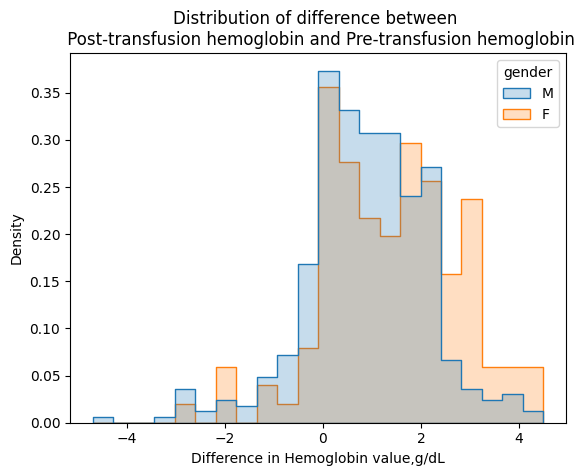

In [96]:
get_hemoglobin_diff_distribution(pre_post_transfusion,'MIMIC')  

#### for other plots

In [111]:
def scatter_ValueDiff_Pretransfusion(df,name):
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=df, x="pre_transfusion", y="value_diff", hue="gender")
    plt.xlabel('Pre-transfusion value')
    plt.ylabel("Value diff")
    plt.title("Value Diff vs Pre-transfusion")
    plt.savefig(f'labevent_plots/{name}_scatter_ValueDiff_Pretransfusion.png')
    plt.show()

def scatter_ValueDiff_Posttransfusion(df,name):
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=df, x="post_transfusion", y="value_diff", hue="gender")
    plt.xlabel('Post-transfusion value')
    plt.ylabel("Value diff")
    plt.title("Value diff vs Post-transfusion, in g/dL")
    plt.savefig(f'labevent_plots/{name}_scatter_ValueDiff_Posttransfusion.png')
    plt.show()
    
def scatter_Counts_Pretransfusion(df,name):
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=df, x="pre_transfusion", y="blood_counts", hue="gender")
    plt.xlabel('Pre-transfusion value')
    plt.ylabel("Blood transfusion counts")
    plt.title("Blood transfusion counts vs Pre-transfusion, in g/dL")
    plt.savefig(f'labevent_plots/{name}_scatter_Counts_Pretransfusion.png')
    plt.show()
    
def boxplot_Pretransfusion_Bloodtransfusion(df,name):
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df, x='blood_counts', y='pre_transfusion')
    plt.ylabel('Pre-transfusion value')
    plt.xlabel("Blood transfusion counts")
    plt.savefig(f'labevent_plots/{name}_boxplot_Pretransfusion_Bloodtransfusion.png')
    plt.show()

def boxplot_Posttransfusion_Bloodtransfusion(df,name):
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df, x='blood_counts', y='post_transfusion')
    plt.savefig(f'labevent_plots/{name}_boxplot_Posttransfusion_Bloodtransfusion.png')
    plt.show()

def multiline_Pretransfusion_Bloodtransfusion(df,name):
    row = 3
    col = 1
    fig, axes = plt.subplots(row,sharex=True, figsize=(16,8))
    fig.suptitle('Pre-transfusion value for patient with different number of blood transfusion')


    for axes_num1 in range(3):

        count = axes_num1+1

        if(count==3):
            partial_fbt_time_differece_Hb = df.loc[(df.blood_counts >= count)]
        else:
            partial_fbt_time_differece_Hb = df.loc[(df.blood_counts == count)]


        sns.kdeplot(ax=axes[axes_num1],x= partial_fbt_time_differece_Hb['pre_transfusion'],label='All')
        mean= partial_fbt_time_differece_Hb.mean().pre_transfusion

        if(count==3):
            axes[axes_num1].set_title('Blood transfusion >='+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+'| Mean ' + str(round(mean,3)))
        else:
            axes[axes_num1].set_title('Blood transfusion '+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+'| Mean ' + str(round(mean,3)))

        axes[2].set_xlabel("Pre-transfusion value")
        axes[axes_num1].legend(loc='upper right')
    fig.savefig(f'labevent_plots/{name}_multiline_Pretransfusion_Bloodtransfusion.png')
    fig.show()

def multiline_Pretransfusion_Bloodtransfusion_gender(df,name):
    row = 3
    col = 1
    fig, axes = plt.subplots(row,sharex=True, figsize=(16,8))
    fig.suptitle('Pre-transfusion value for patient with different number of blood transfusion')


    for axes_num1 in range(3):
        count = axes_num1+1

        if(count==3):
            partial_fbt_time_differece_Hb = df.loc[(df.blood_counts >= count)]
        else:
            partial_fbt_time_differece_Hb = df.loc[(df.blood_counts == count)]

        male_Hb = partial_fbt_time_differece_Hb[partial_fbt_time_differece_Hb.gender == 'M']
        sns.kdeplot(ax=axes[axes_num1],x=male_Hb['pre_transfusion'], label='male')
        female_Hb =partial_fbt_time_differece_Hb[partial_fbt_time_differece_Hb.gender == 'F']
        sns.kdeplot(ax=axes[axes_num1],x=female_Hb['pre_transfusion'],label='female')
        sns.kdeplot(ax=axes[axes_num1],x= partial_fbt_time_differece_Hb['pre_transfusion'],label='All')
        mean= partial_fbt_time_differece_Hb.mean().pre_transfusion
        fmean = female_Hb.pre_transfusion.mean()
        mmean= male_Hb.pre_transfusion.mean()

        if(count==3):
            axes[axes_num1].set_title('Blood transfusion >='+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+ '| Mean ' + str(round(mean,3)) +'| F Mean '+str(round(fmean,3)) + '| M Mean '+str(round(mmean,3)))
        else:
            axes[axes_num1].set_title('Blood transfusion '+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+'| Mean ' + str(round(mean,3)) +'| F Mean '+str(round(fmean,3)) + '| M Mean '+str(round(mmean,3)))


        axes[2].set_xlabel("Pre-transfusion value")
        axes[axes_num1].legend(loc='upper right')
    fig.savefig(f'labevent_plots/{name}_multiline_Pretransfusion_Bloodtransfusion_gender.png')
    fig.show()

def multiline_Posttransfusion_Bloodtransfusion_gender(df,name):
    row = 3
    col = 1
    fig, axes = plt.subplots(row,sharex=True, figsize=(16,8))
    fig.suptitle('Post-transfusion value for patient with different number of blood transfusion')


    for axes_num1 in range(3):
        count = axes_num1+1

        if(count==3):
            partial_fbt_time_differece_Hb = df.loc[(df.blood_counts >= count)]
        else:
            partial_fbt_time_differece_Hb = df.loc[(df.blood_counts == count)]

        male_Hb = partial_fbt_time_differece_Hb[partial_fbt_time_differece_Hb.gender == 'M']
        sns.kdeplot(ax=axes[axes_num1],x=male_Hb['post_transfusion'], label='male')
        female_Hb =partial_fbt_time_differece_Hb[partial_fbt_time_differece_Hb.gender == 'F']
        sns.kdeplot(ax=axes[axes_num1],x=female_Hb['post_transfusion'],label='female')
        sns.kdeplot(ax=axes[axes_num1],x= partial_fbt_time_differece_Hb['post_transfusion'],label='All')
        mean= partial_fbt_time_differece_Hb.mean().post_transfusion
        fmean = female_Hb.pre_transfusion.mean()
        mmean= male_Hb.pre_transfusion.mean()

        if(count==3):
            axes[axes_num1].set_title('Blood transfusion >='+str(count)+  '|Patients '+str(len(partial_fbt_time_differece_Hb))+ '| Mean ' + str(round(mean,3))+'| F Mean '+str(round(fmean,3)) + '| M Mean '+str(round(mmean,3)))
        else:
            axes[axes_num1].set_title('Blood transfusion '+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+'| Mean ' + str(round(mean,3))+'| F Mean '+str(round(fmean,3)) +'| M Mean '+str(round(mmean,3)))


        axes[2].set_xlabel("Post_transfusion value")
        axes[axes_num1].legend(loc='upper right')
    fig.savefig(f'labevent_plots/{name}_multiline_Posttransfusion_Bloodtransfusion_gender.png')
    fig.show()
        
def multiline_valuediff_Bloodtransfusion_gender(df,name):
    #value_diff
    row = 3
    col = 1
    fig, axes = plt.subplots(row,sharex=True, figsize=(16,8))
    fig.suptitle('Value Diff for patient with different number of blood transfusion')


    for axes_num1 in range(3):
        count = axes_num1+1

        if(count==3):
            partial_fbt_time_differece_Hb = df.loc[(df.blood_counts >= count)]
        else:
            partial_fbt_time_differece_Hb = df.loc[(df.blood_counts == count)]

        male_Hb = partial_fbt_time_differece_Hb[partial_fbt_time_differece_Hb.gender == 'M']
        sns.kdeplot(ax=axes[axes_num1],x=male_Hb['value_diff'], label='male')
        female_Hb =partial_fbt_time_differece_Hb[partial_fbt_time_differece_Hb.gender== 'F']
        sns.kdeplot(ax=axes[axes_num1],x=female_Hb['value_diff'],label='female')
        sns.kdeplot(ax=axes[axes_num1],x= partial_fbt_time_differece_Hb['value_diff'],label='All')
        mean= partial_fbt_time_differece_Hb.mean().value_diff
        fmean = female_Hb.pre_transfusion.mean()
        mmean= male_Hb.pre_transfusion.mean()

        if(count==3):
            axes[axes_num1].set_title('Blood transfusion >='+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+'| Mean ' + str(round(mean,3)) +'| F Mean '+str(round(fmean,3)) +'| M Mean '+str(round(mmean,3)))
        else:
            axes[axes_num1].set_title('Blood transfusion '+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+'| Mean ' + str(round(mean,3)) +'| F Mean '+str(round(fmean,3)) +'| M Mean '+str(round(mmean,3)))


        axes[2].set_xlabel("Value Diff")
        axes[axes_num1].legend(loc='upper right')
    fig.savefig(f'labevent_plots/{name}_multiline_valuediff_Bloodtransfusion_gender.png')
    fig.show()
        
def boxplot_Pretransfusion_Bloodtransfusion_gender(df,name):
    
    plt.figure(figsize=(7, 7))
    sns.boxplot(data=df, x='blood_counts', y='pre_transfusion', hue="gender")
    plt.xlabel("Blood counts", fontsize=14)
    plt.ylabel("Pre transfusion", fontsize=14)
    plt.title("Pre transfusion by blood counts & gender Group")
    plt.savefig(f'labevent_plots/{name}_boxplot_Pretransfusion_Bloodtransfusion_gender.png')
    plt.show()
    
        
def scatter_Pretransfusion_PreFbtTime(df,name):
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=df, y="labevent_before_tranfusion_diff_min", x="pre_transfusion", hue="gender")
    plt.xlabel('Pre-transfusion value')
    plt.ylabel("Time between Pre-transfusion and first blood transfusion, in Minutes")
    plt.title("Pre-transfusion value vs time \n between Pre-transfusion and first blood transfusion")
    plt.savefig(f'labevent_plots/{name}_scatter_Pretransfusion_PreFbtTime.png')
    plt.show()  
    
    
def scatter_Posttransfusion_FbtPostTime(df,name):
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=df, y="labevent_after_tranfusion_diff_min", x="post_transfusion", hue="gender")
    plt.ylabel('Time between blood transfusion and Post-transfusion, in Minutes')
    plt.xlabel("Post-transfusion value")
    plt.title("Post-transfusion value vs Time \n between blood transfusion and Post-transfusion")
    plt.savefig(f'labevent_plots/{name}_scatter_Posttransfusion_FbtPostTime.png')
    plt.show()  
    
def scatter_Valuediff_PrePostTime(df,name):
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=df, y="labevent_time_diff_min", x="value_diff", hue="gender")
    plt.ylabel('Time between pre-transfusion  and post-transfusion, in Minutes')
    plt.xlabel("Value diff")
    plt.title("Measurement Difference (Before and After, in g/dL)")
    plt.savefig(f'labevent_plots/{name}_scatter_Valuediff_PrePostTime.png')
    plt.show()  
    
def scatter_Valuediff_FbtPostTime(df,name):
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=df, y="labevent_after_tranfusion_diff_min", x="value_diff", hue="gender")
    plt.xlabel('Value diff')
    plt.ylabel("Time between first blood transfusion and post-transfusion, in Minutes")
    plt.title("Measurement Difference (Before and After, in g/dL)")
    plt.savefig(f'labevent_plots/{name}_scatter_Valuediff_FbtPostTime.png')
    plt.show()  
    

def histplot_PosttransfusionTime(df,name):
    plt.figure(figsize=(7,7))
    sns.displot(data=df, x="labevent_after_tranfusion_diff_min", stat="density")
#     sns.histplot(data=df, x="labevent_after_tranfusion_diff_min", element="step",
#     stat="density", common_norm=False,)  
    plt.xlabel("Time difference first blood transfusion and post-transfusion, in Minutes")
    plt.title("Time difference between first blood transfusion and post-transfusion, in Minutes")
    plt.savefig(f'labevent_plots/{name}_histplot_PosttransfusionTime.png')
    plt.show()   
    

def boxplot_PosttransfusionTime(df,name):
    sns.boxplot(x="gender", y="labevent_after_tranfusion_diff_min", data=df)
    plt.title("Time difference between first blood transfusion and post-transfusion, in Minutes")
    plt.ylabel("Time difference ")
    plt.savefig(f'labevent_plots/{name}_boxplot_PosttransfusionTime.png')
    plt.show()   
    
def histplot_PretransfusionTime(df,name):
    plt.figure(figsize=(7,7))
    sns.displot(data=df, x="labevent_before_tranfusion_diff_min", stat="density")
#     sns.histplot(data=df, x="labevent_before_tranfusion_diff_min",element="step",
#     stat="density", common_norm=False,)  
    plt.xlabel("Time between pre-transfusion and first blood transfusion, in Minutes")
    plt.title("Time difference between pre-transfusion and first blood transfusion, in Minutes")
    plt.savefig(f'labevent_plots/{name}_histplot_PretransfusionTime.png')
    plt.show()   

    
def boxplot_PretransfusionTime(df,name):
    sns.boxplot(x="gender", y="labevent_before_tranfusion_diff_min", data=df)
    plt.title("Time difference between pre-transfusion and first blood transfusion, in Minutes")
    plt.ylabel("Time difference ")
    plt.savefig(f'labevent_plots/{name}_boxplot_PretransfusionTime.png')
    plt.show()   
    
    
    

In [108]:
pre_post_transfusion

,hadm_id,gender,description,pre_transfusion,post_transfusion,value_diff,valueuom,charttime_before,blood_transfusion_starttime,charttime_after,labevent_time_diff_min,labevent_before_tranfusion_diff_min,labevent_after_tranfusion_diff_min,blood_counts
0,20006999,M,Hemoglobin,8.5,9.7,1.2,g/dL,2127-06-19T02:36:00,2127-06-19T08:15:00,2127-06-19T13:55:00,679,339,340,2
1,20006999,M,Hemoglobin,8.5,9.7,1.2,g/dL,2127-06-19T02:36:00,2127-06-19T09:48:00,2127-06-19T13:55:00,679,432,247,2
2,20032691,F,Hemoglobin,8.0,9.9,1.9,g/dL,2123-03-05T13:10:00,2123-03-05T16:34:00,2123-03-05T22:59:00,589,204,385,1
3,20044587,M,Hemoglobin,9.5,9.3,-0.2,g/dL,2113-08-25T14:48:00,2113-08-25T20:01:00,2113-08-26T03:15:00,747,313,434,3
4,20044587,M,Hemoglobin,9.5,9.3,-0.2,g/dL,2113-08-25T14:48:00,2113-08-25T21:01:00,2113-08-26T03:15:00,747,373,374,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,29924353,M,Hemoglobin,9.0,9.6,0.6,g/dL,2172-03-24T01:53:00,2172-03-24T13:58:00,2172-03-24T16:00:00,847,725,122,4
514,29949404,M,Hemoglobin,10.0,10.5,0.5,g/dL,2169-02-27T12:31:00,2169-02-27T14:30:00,2169-02-28T03:03:00,872,119,753,2
515,29949404,M,Hemoglobin,10.0,10.5,0.5,g/dL,2169-02-27T12:31:00,2169-02-27T15:25:00,2169-02-28T03:03:00,872,174,698,2
516,29964086,M,Hemoglobin,9.6,10.9,1.3,g/dL,2166-04-02T03:03:00,2166-04-02T05:57:00,2166-04-02T08:46:00,343,174,169,2


In [109]:
def get_EDA(df,name):
    
    
    print(f"Below EDA is for labevents {name}")
    scatter_ValueDiff_Pretransfusion(df,name)
    scatter_ValueDiff_Posttransfusion(df,name)
    scatter_Counts_Pretransfusion(df,name)
    boxplot_Pretransfusion_Bloodtransfusion(df,name)
    boxplot_Posttransfusion_Bloodtransfusion(df,name)
    multiline_Pretransfusion_Bloodtransfusion(df,name)
    multiline_Pretransfusion_Bloodtransfusion_gender(df,name)
    multiline_Posttransfusion_Bloodtransfusion_gender(df,name)
    multiline_valuediff_Bloodtransfusion_gender(df,name)
    boxplot_Pretransfusion_Bloodtransfusion_gender(df,name)
    scatter_Pretransfusion_PreFbtTime(df,name)
    scatter_Posttransfusion_FbtPostTime(df,name)
    scatter_Valuediff_PrePostTime(df,name)
    scatter_Valuediff_FbtPostTime(df,name)

    histplot_PosttransfusionTime(df,name)
    boxplot_PosttransfusionTime(df,name)
    histplot_PretransfusionTime(df,name)
    boxplot_PretransfusionTime(df,name)
    
    
    
    
  
    
     
    

    return 

Below EDA is for labevents Hemoglobin


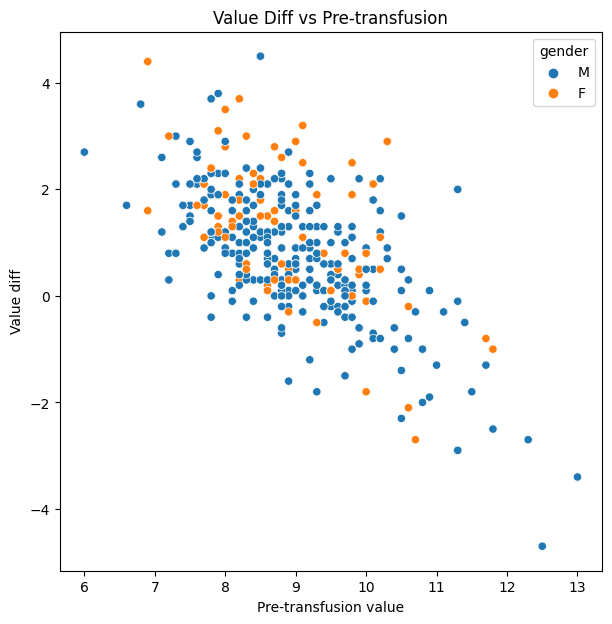

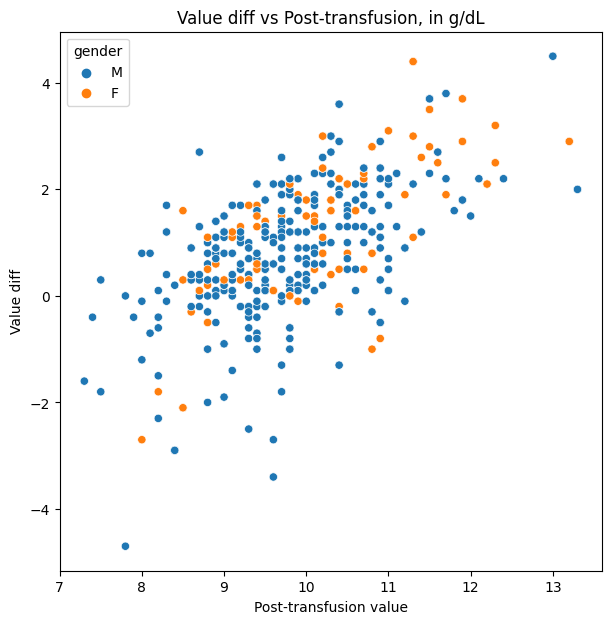

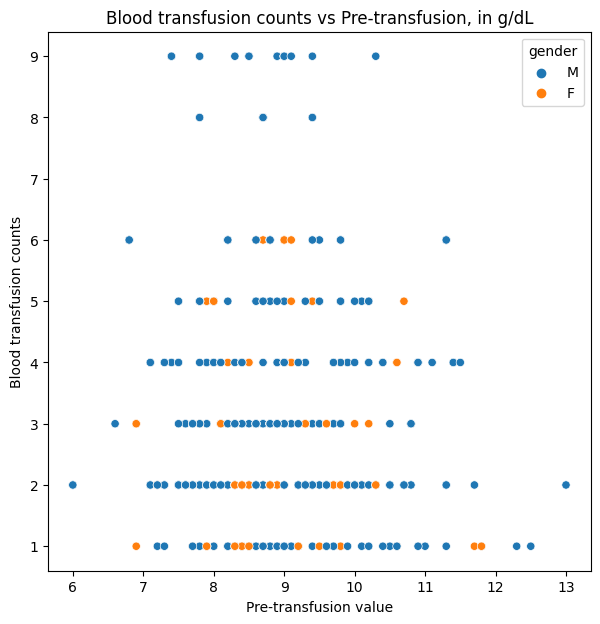

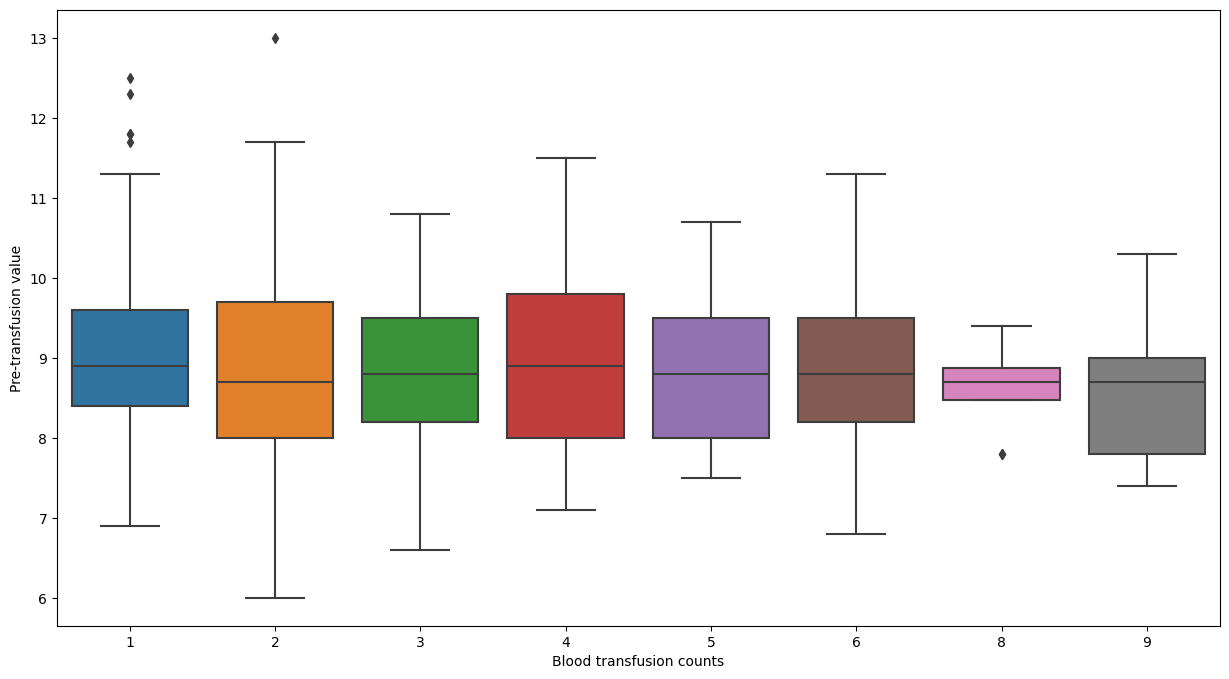

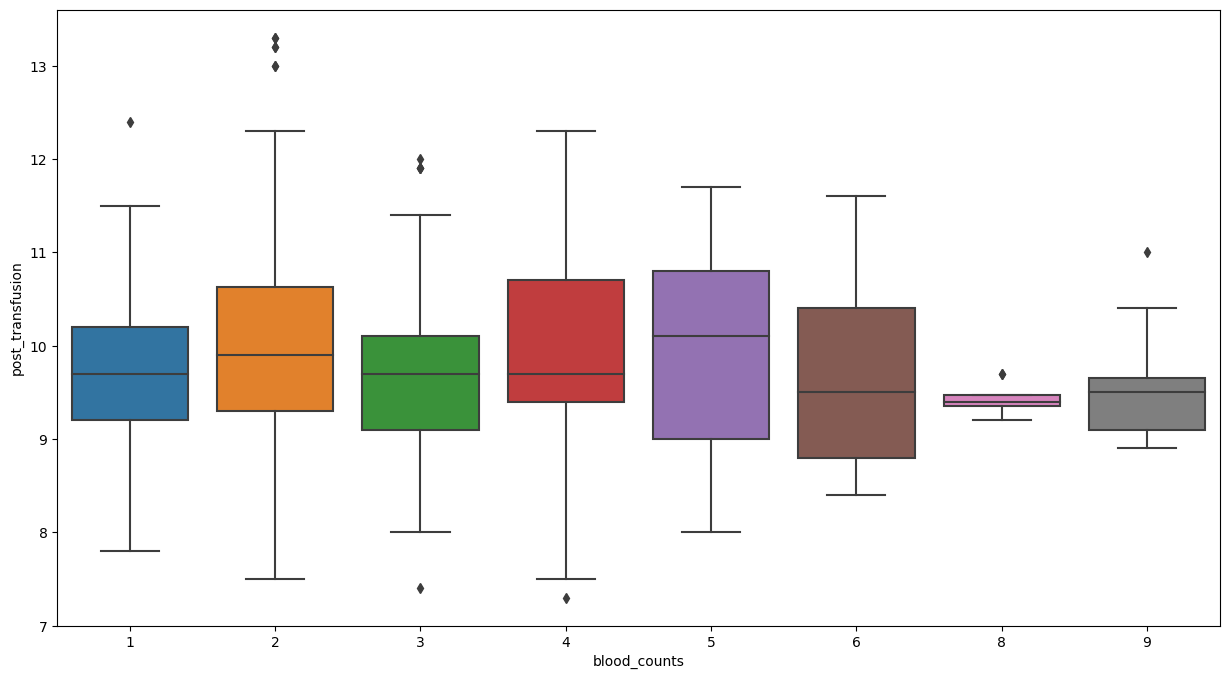

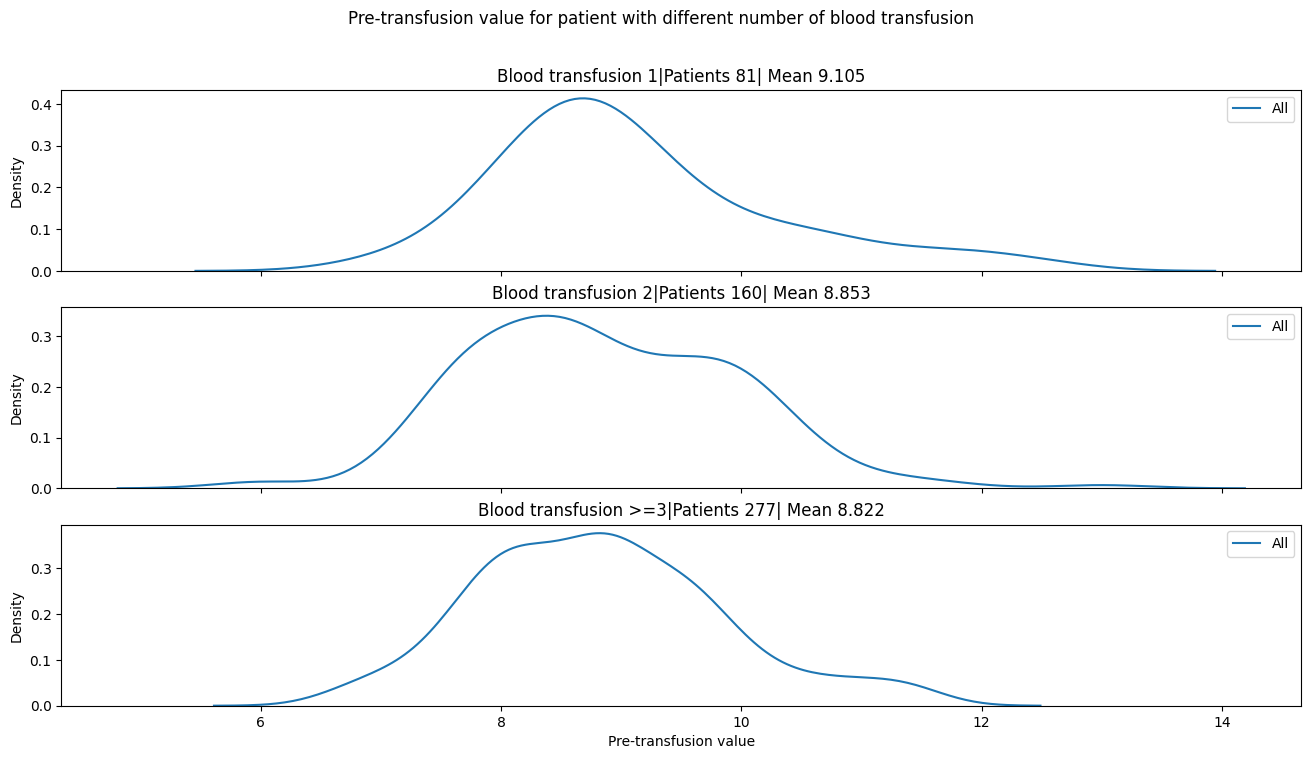

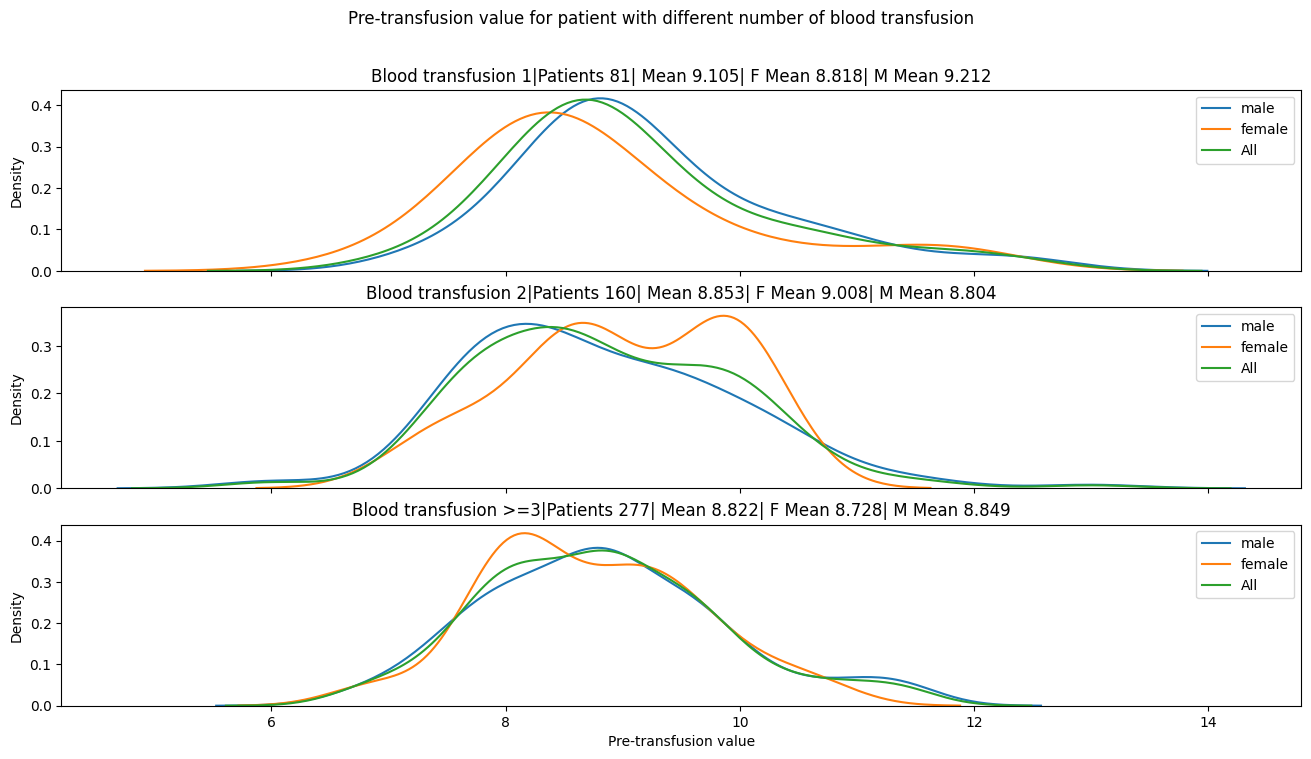

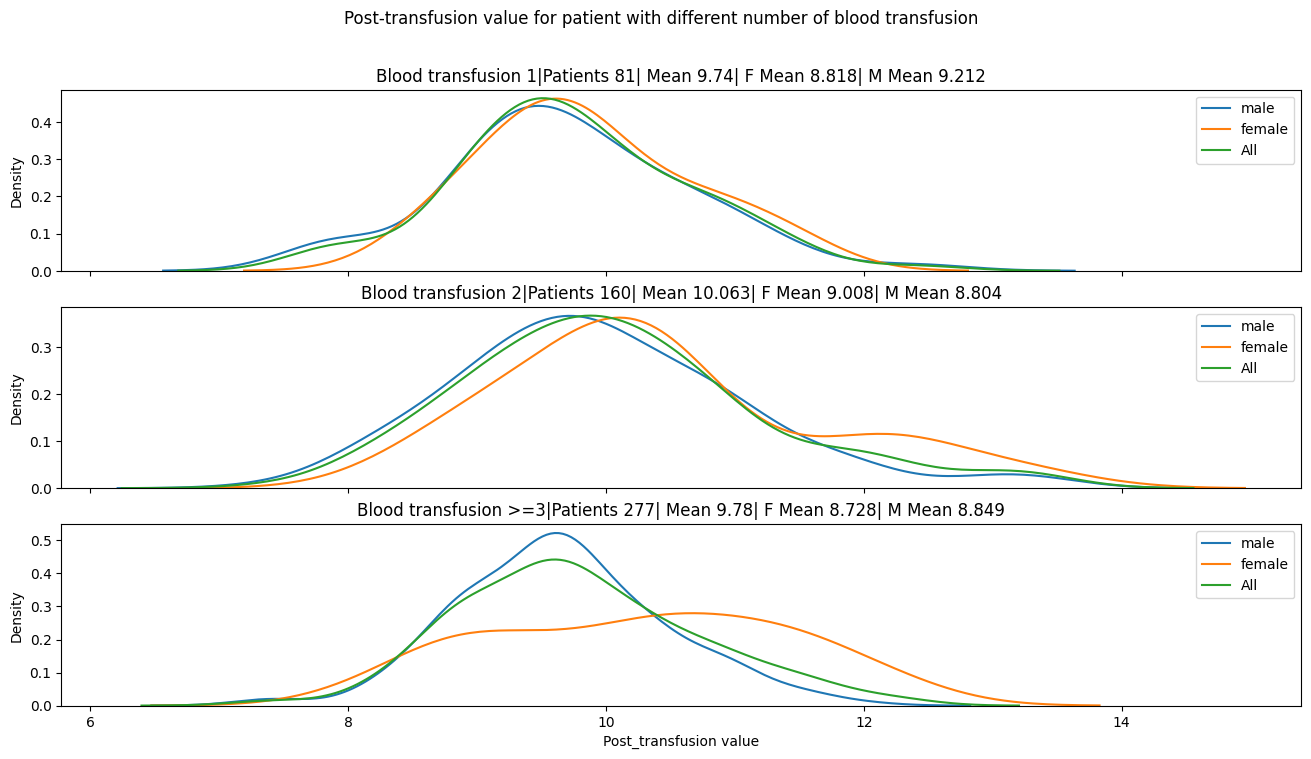

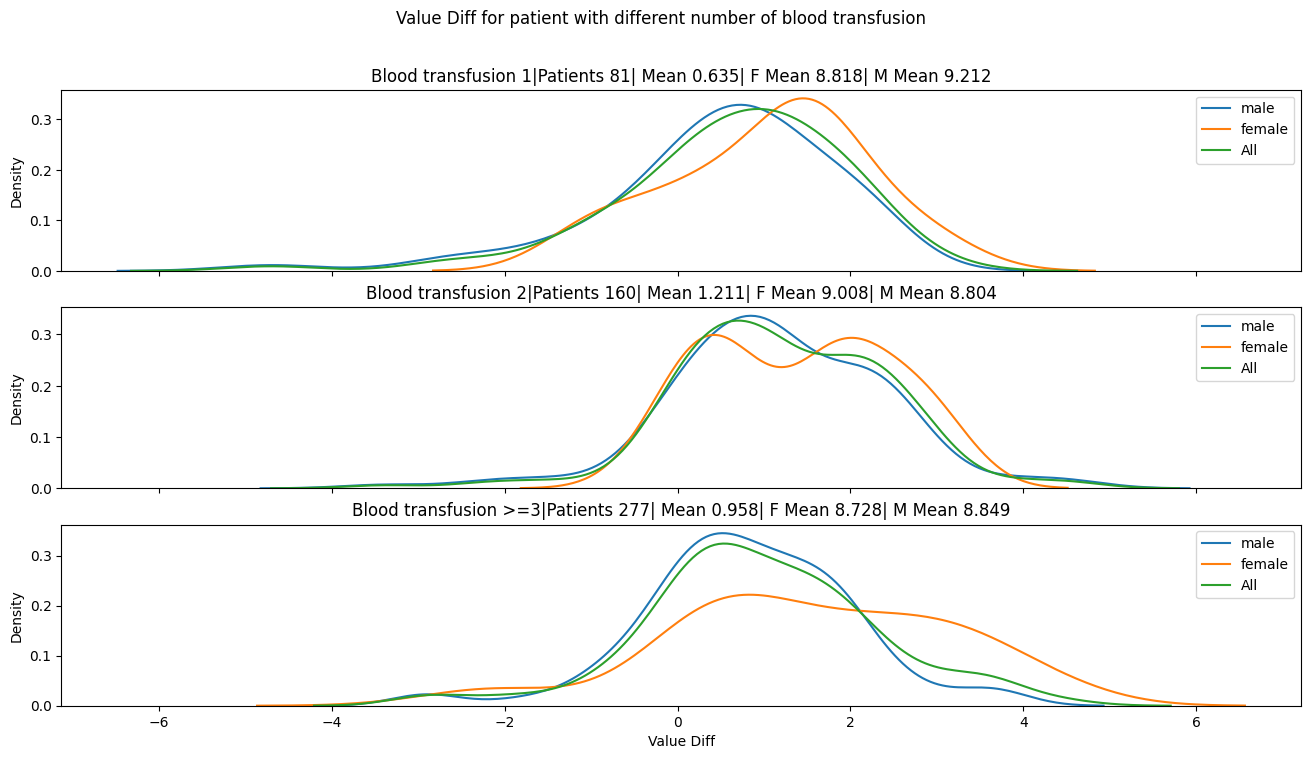

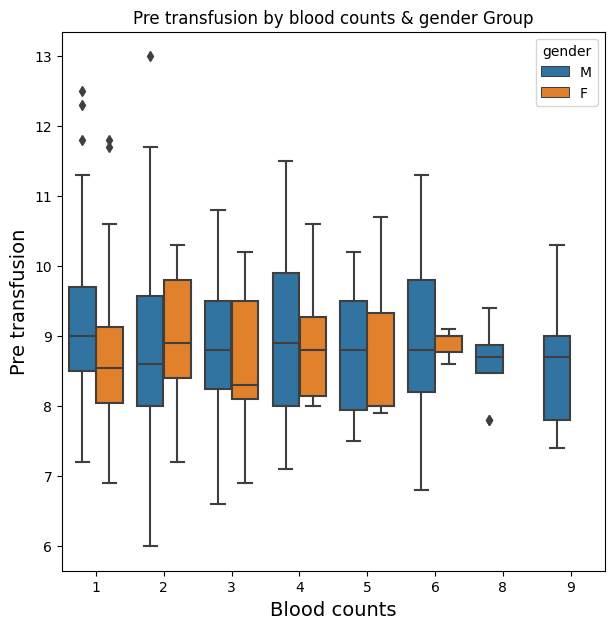

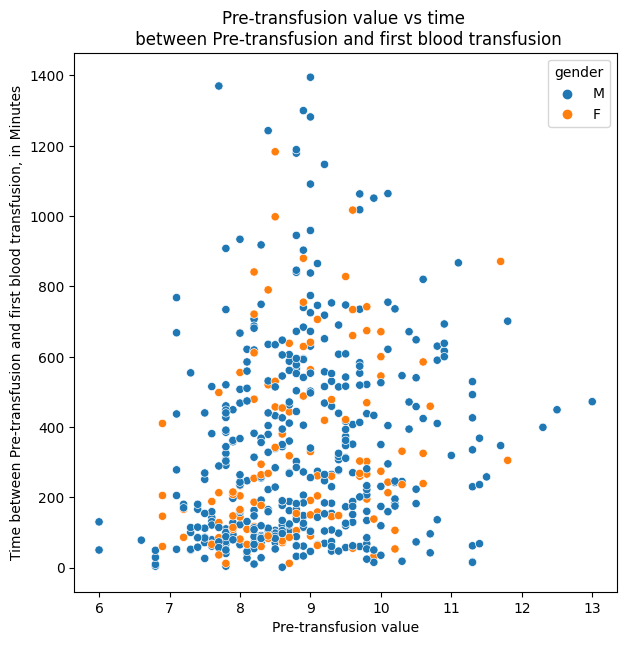

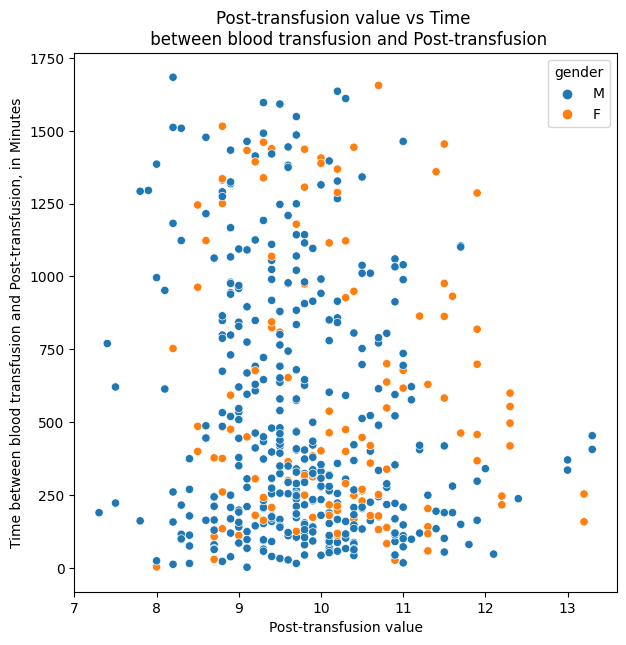

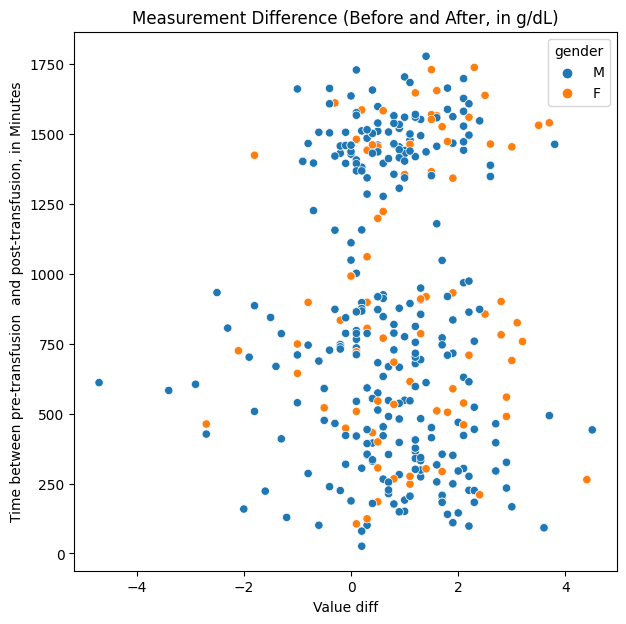

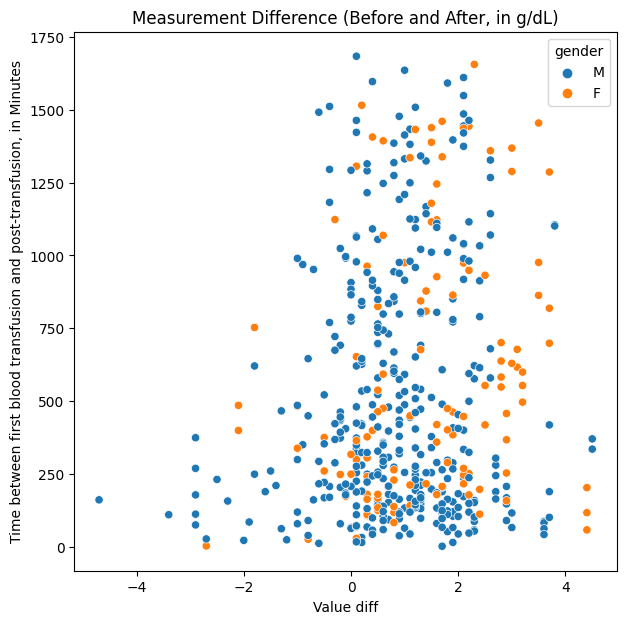

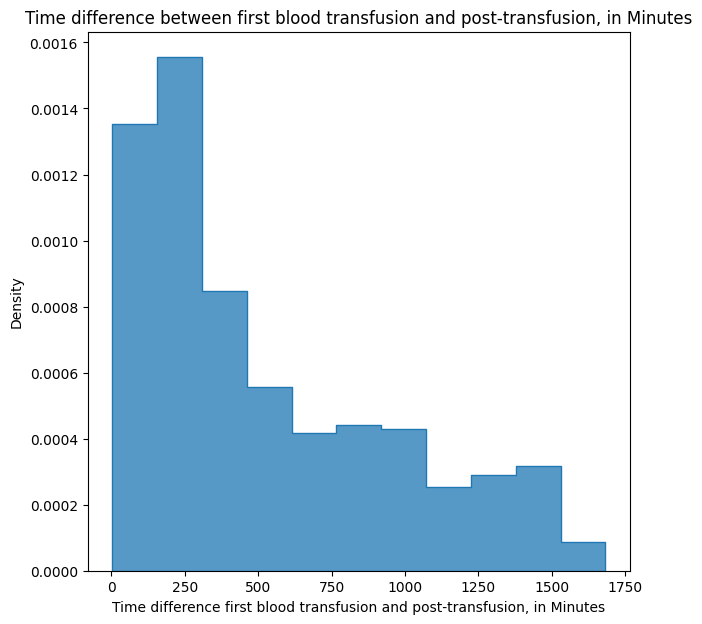

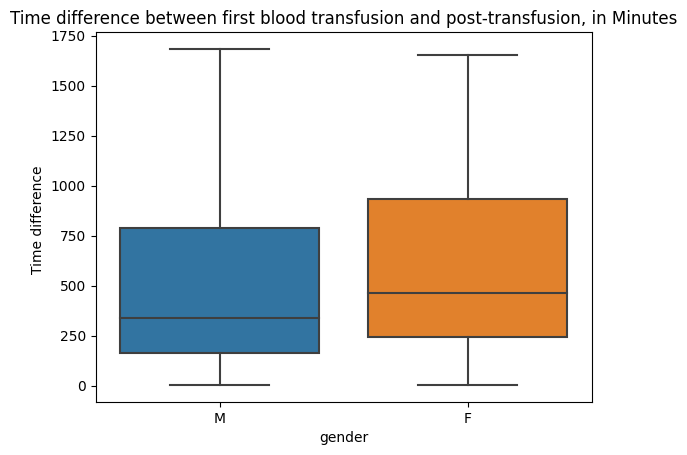

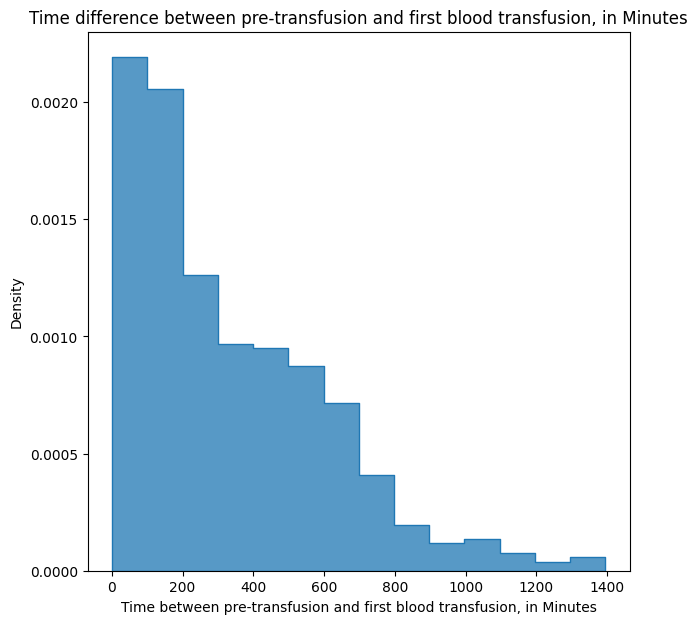

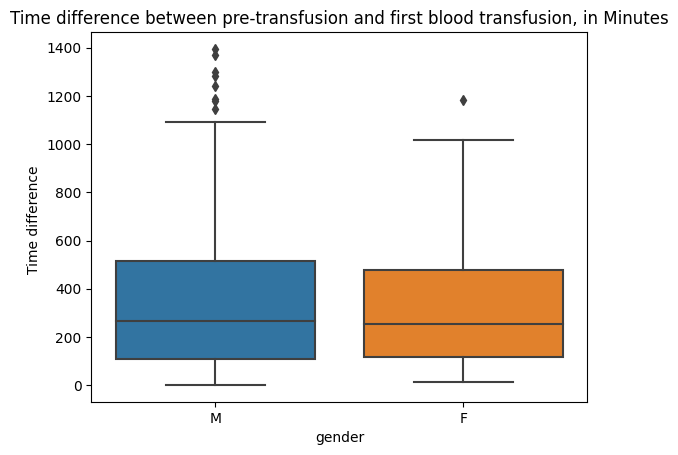

In [110]:
get_EDA(pre_post_transfusion,"Hemoglobin")

#### Clinician interest on Hemoglobin measurement
- number of time that hemoglobin was measured right from the beginning of the surgery to the first 24 hours of the intensive care 

In [112]:
hemoglobin_24h_count = pd.read_csv('hemoglobin_24h_count.csv') 
hemoglobin_24h_count

,hadm_id,gender,counts
0,21793708,M,3
1,25175175,M,3
2,23478116,M,3
3,26262347,M,4
4,26943137,M,5
...,...,...,...
805,21506797,M,13
806,28196463,M,14
807,23027623,M,14
808,27279120,M,15


In [113]:
def histplot_24H_Hb_measurement(df,name):
    # without gender
#     plt.figure(figsize=(7,7))
#     sns.displot(data=df, x="counts", stat="density")
#     sns.histplot(data=df, x="counts", kde=True)
    sns.histplot(df, x="counts", element="step",
    stat="density", common_norm=False,)  
    print(f'mean is {round(np.mean(df.counts.values),2)} and std is {round(np.std(df.counts.values),2)}')

    plt.title('Number of hemoglobin measurements from \n the beginning of the surgery to the first 24 hours of the intensive care')
    plt.xlabel('Number of hemoglobin measurements')
    plt.ylabel('Density')
    plt.savefig(f'Additional_Hb_plots/histplot_numberOfHBmeasurement24H.png')
    plt.show() 
    
    
    # for gender
    sns.histplot(df, x="counts", hue="gender", element="step",
    stat="density", common_norm=False,)  
    female = df.loc[df['gender'] =='F']
    male = df.loc[df['gender'] =='M']
    print(f'For female mean is {round(np.mean(female.counts.values),2)} and std is {round(np.std(female.counts.values),2)}')
    print(f'For male mean is {round(np.mean(male.counts.values))} and std is {round(np.std(male.counts.values),2)}')
   
    plt.title('Number of hemoglobin measurements from \n the beginning of the surgery to the first 24 hours of the intensive care')
    plt.xlabel('Number of hemoglobin measurements')
    plt.ylabel('Density')
    plt.savefig(f'Additional_Hb_plots/histplot_numberOfHBmeasurement24H_gender.png')
    plt.show()
    
    
    
    sns.boxplot(x="gender", y='counts', data=df)
    plt.title("Number of hemoglobin measurements")
    plt.ylabel('Number of hemoglobin measurements')
    plt.savefig(f'Additional_Hb_plots/boxplot_numberOfHBmeasurement24H_gender.png')
    plt.show()



mean is 7.61 and std is 1.53


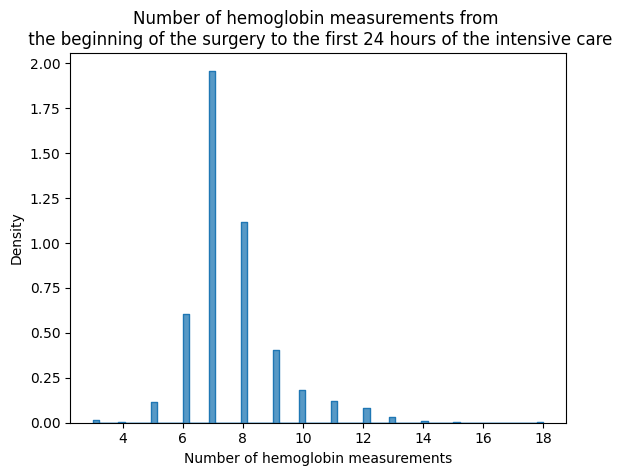

For female mean is 7.73 and std is 1.66
For male mean is 8 and std is 1.5


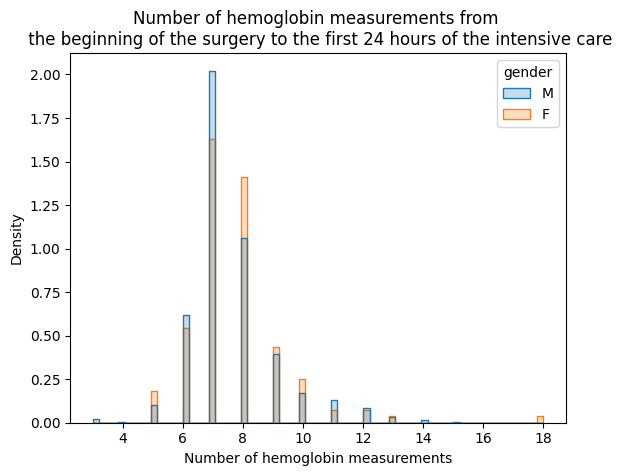

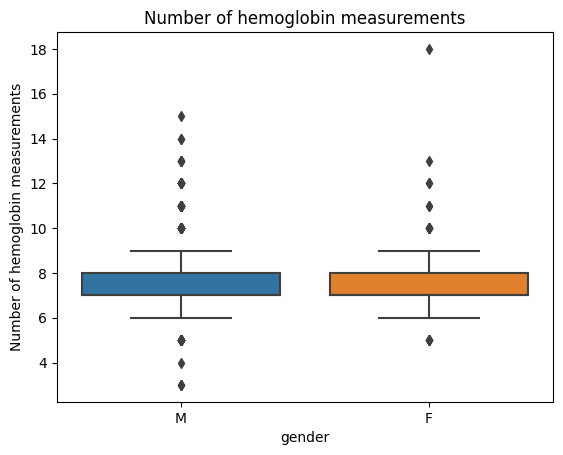

In [114]:
histplot_24H_Hb_measurement(hemoglobin_24h_count,'MIMIC')

#### ICU stay time

In [115]:
#icu_stay_time = pd.read_csv('icu_stay_time.csv')
icu_stay_time = pd.read_csv('icu_stay_time_day.csv')
icu_stay_time_blood_counts = icu_stay_time.merge(blood_transfusion_count, how = 'right', on='hadm_id')
# icu_stay_time_blood_counts
icu_stay_time

,hadm_id,icu_stay_time
0,24302767,1
1,21670841,1
2,28444159,1
3,22977945,1
4,21056022,1
...,...,...
805,29636680,19
806,25043633,20
807,23427760,22
808,21582058,25


In [118]:
def boxplot_icu_stay_time(df,name):
    
    plt.figure(figsize=(7,7))
    sns.boxplot(data=df, y="icu_stay_time")
    print(f'mean is {round(np.mean(df.icu_stay_time.values),2)} and std is {round(np.std(df.icu_stay_time.values),2)}')
    #sns.histplot(data=icu_stay_time_blood_counts, x="icu_stay_time")
    plt.title("Icu stay time distribution")
    plt.savefig(f'Additional_CABG_plots/{name}_boxtplot_icu_stay_time.png')
    plt.show()

mean is 2.05 and std is 2.66


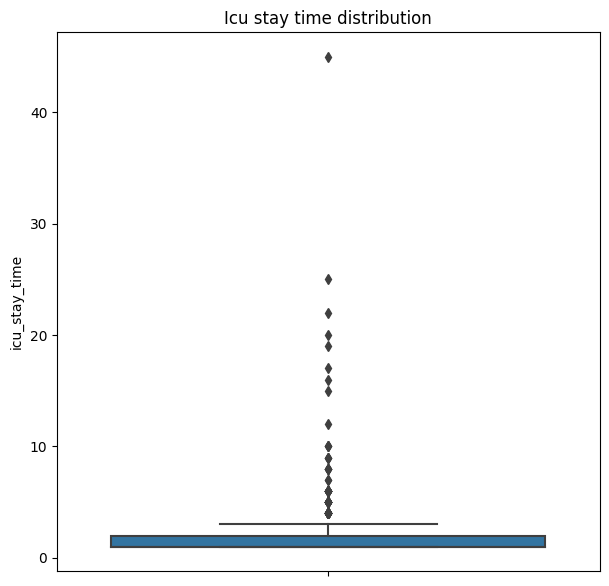

In [119]:
boxplot_icu_stay_time(icu_stay_time,"MIMIC")

In [120]:
icu_stay_time_blood_counts

,hadm_id,icu_stay_time,gender,counts
0,20006999,3,M,2
1,20032691,1,F,1
2,20044587,2,M,3
3,20087019,2,F,3
4,20088888,5,M,3
...,...,...,...,...
227,29919383,2,F,2
228,29923776,10,M,4
229,29924353,3,M,4
230,29949404,1,M,2


mean is 2.91 and std is 2.3


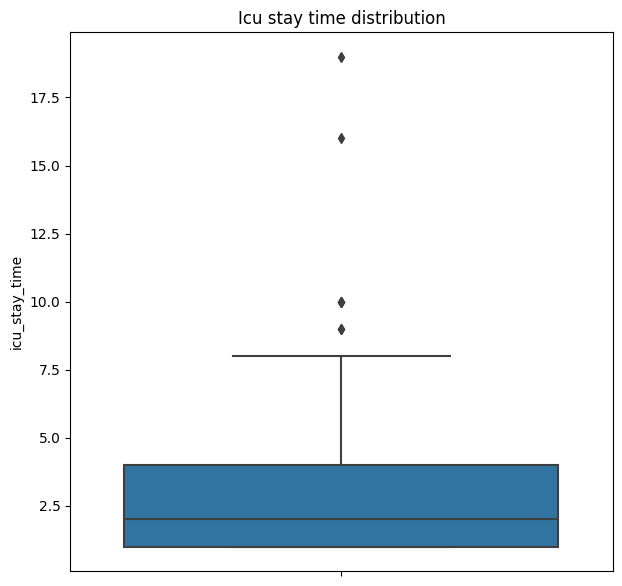

In [121]:
boxplot_icu_stay_time(icu_stay_time_blood_counts,"MIMIC_withbloodtranfusion")